In [7]:
# In[3]:

import datetime

import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib.colorbar as mpl_colorbar
import matplotlib.patches as mpatches

import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools

%matplotlib inline

mon_s = input("Month (ex:sep): ")

# In[4]:

#End of spit
late = 49.205
lone = -123.26
#Further up spit
lats = 49.214
lons = -123.22

deep = 110
shallow = 35


# In[9]:

bathy = nc.Dataset("/home/gsgarbi/analysis-giorgio/sequential/"+mon_s+'/bathy_meter_SalishSea2.nc')
model_lats = bathy.variables['nav_lat'][:]
model_lons = bathy.variables['nav_lon'][:]
depth = bathy.variables['Bathymetry'][:]


# In[ ]:

dx = 1.2
lat = late + dx * (late - lats)
lon = lone + dx * (lone - lons)
y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)
#print(depth[y, x])
print(x, y)
#print('And in Fortran for ariane', y + 1, x + 1)
# point I used
outy = y - 1
outx = x - 1


print (outx, outy)
#print('Point I used', outx, outy)

Month (ex:sep): mar
303 445
302 444


In [8]:
# In[ ]:

#ugrid = nc.Dataset('')
#darray = ugrid.variables['depth'][:]
#print (darray[27-1])
#uvel = ugrid.variables['uVelocity'][:]
#print (uvel.shape)


In [ ]:
Intervals of 1h

In [9]:
traj = np.loadtxt("/home/gsgarbi/analysis-giorgio/sequential/"+mon_s+'/traj.txt', delimiter = ' ')
(X,Y) = (traj[0,1], traj[0,2])
print (X, Y)
print (traj[0])
print (traj.shape)

-123.30807 49.19026
[   1.      -123.30807   49.19026  -98.35227    0.     ]
(233292, 5)


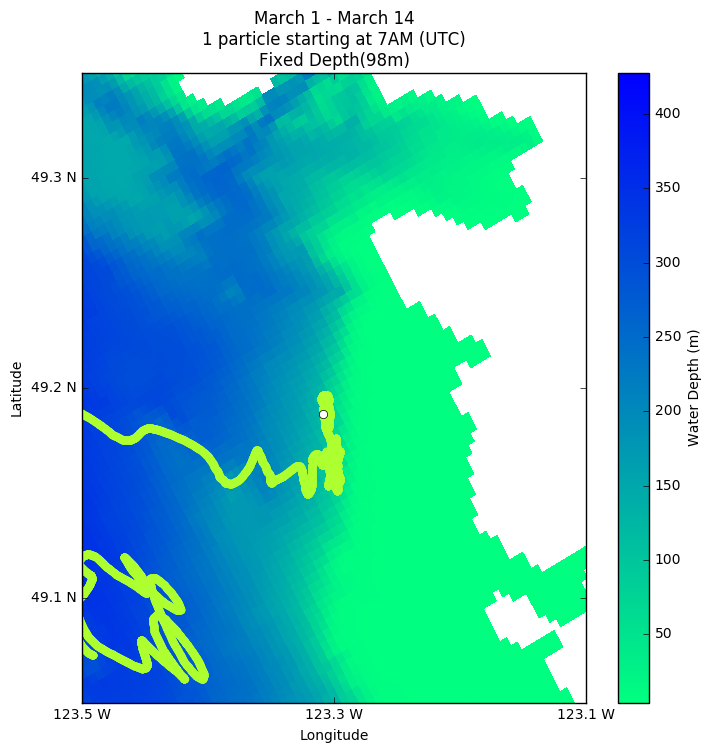

In [10]:
# 1 particle, 2 weeks, fixed depth

fig = plt.figure(figsize=(7, 7))

ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))


for i in range(traj.shape[0]):
    if traj[i,0] == 1:
        ax.scatter(traj[i, 1], traj[i, 2], color="greenyellow")
    


ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')

ax.set_title("""March 1 - March 14
1 particle starting at 7AM (UTC)
Fixed Depth(98m)""")

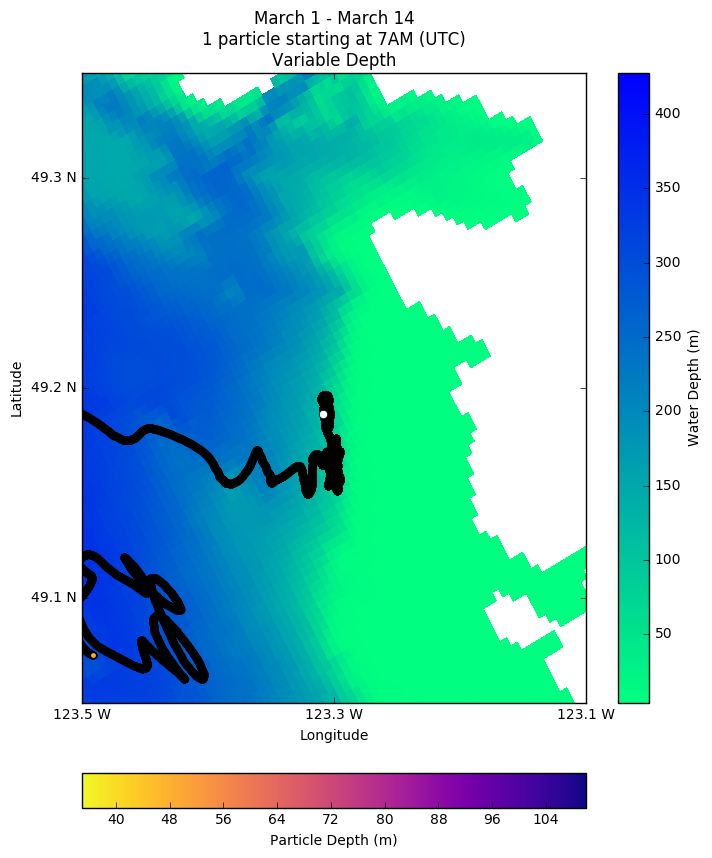

In [12]:
# 1 particle, 2 weeks, variable depths 

#traj = np.loadtxt("/home/gsgarbi/analysis-giorgio/sequential/"+mon_s+'/trajectories/traj.txt', delimiter = ' ')


fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.05, 0.00, 0.72, 0.05])
ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))


for i in range(traj.shape[0]):
    scaled_z = 1-(deep + traj[i, 3]) / (deep - shallow)
    cmap = plt.cm.plasma_r
    color = cmap(scaled_z)
    if traj[i,0] == 1:
        ax.scatter(traj[i, 1], traj[i, 2], c=color)
norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
cb1 = mpl_colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Particle Depth (m)')
ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')

ax.set_title("""March 1 - March 14
1 particle starting at 7AM (UTC)
Variable Depth""");

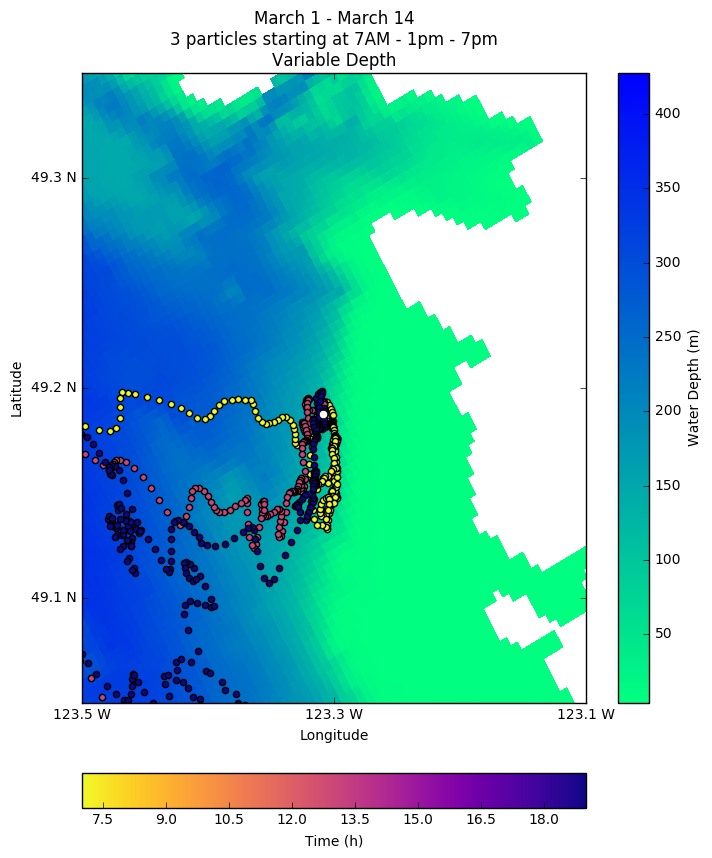

In [34]:
# 3 particles, 2 weeks, fixed depth

traj = np.loadtxt("/home/gsgarbi/analysis-giorgio/sequential/"+mon_s+'/trajectories/traj.txt', delimiter = ' ')

fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.05, 0.00, 0.72, 0.05])
ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))


late = 19.5

early = 7.5

for i in range(traj.shape[0]):
    
    scaled_traj = (traj[i, 0]-1)/4
    cmap = plt.cm.plasma_r
    color = cmap(scaled_traj)
    if traj[i,0]%2 == 1:
        ax.scatter(traj[i, 1], traj[i, 2], c=color)
    
early = 7.5
late = 19.5
    
norm = mpl_colors.Normalize(vmin=19, vmax=7)
cb1 = mpl_colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Time (h)')

ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')

ax.set_title("""March 1 - March 14
3 particles starting at 7AM - 1pm - 7pm
Variable Depth""");

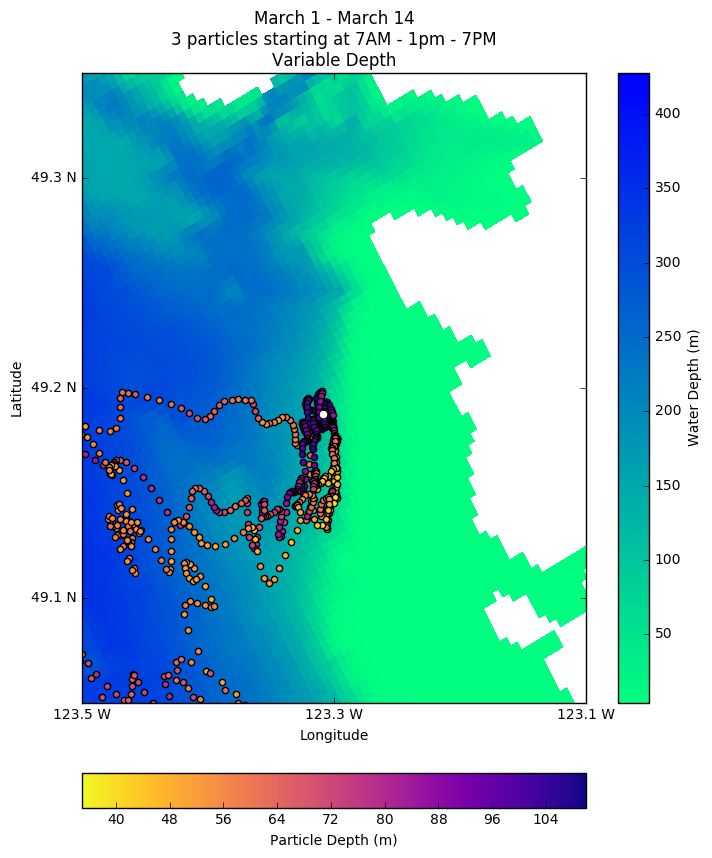

In [32]:
# 3 particles, 2 weeks, variable depths 


fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.05, 0.00, 0.72, 0.05])
ax = fig.add_axes([0.05, 0.15, 0.9, 0.9])
mesh = ax.pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
ax.set_xlim((-123.5, -123.1))
ax.set_ylim((49.05, 49.35))


for i in range(traj.shape[0]):
    scaled_z = 1-(deep + traj[i, 3]) / (deep - shallow)
    cmap = plt.cm.plasma_r
    color = cmap(scaled_z)
    if traj[i,0]%2 == 1:
        ax.scatter(traj[i, 1], traj[i, 2], c=color)
        
#bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#ax.text(X, Y, "Sample A", ha="center", va="center", size=3,
        #bbox=bbox_props)
#ax.text(X, Y+0.02, "Deep Initial Positions", ha="center", va="center", bbox=bbox_props)


'''ax.annotate("Iona Outfall",
            xy=(X, Y), xycoords='data',
            xytext=(X+0.05, Y-0.05), textcoords='data',
            arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                            color="black",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

ax.annotate("Vertical current up",
            xy=(X, Y), xycoords='data',
            xytext=(X-0.05, Y-0.1), textcoords='data',
            arrowprops=dict(arrowstyle="<-", #linestyle="dashed",
                            color="black",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

###
#ax.annotate("Annotation",
           #xy=(X, Y), xycoords='data',
            #xytext=(X+0.02, Y+0.02), textcoords='offset points',
            #)

#bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#ax.text(X, Y, "Sample A", ha="center", va="center", size=3,
        #bbox=bbox_props)
#ax.text(X, Y+0.02, "Deep Initial Positions", ha="center", va="center", bbox=bbox_props)

#ax.text(X-0.15, Y-0.1, "close to the surface", ha="center", va="center", bbox=bbox_props)

'''

norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
cb1 = mpl_colorbar.ColorbarBase(
ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Particle Depth (m)')
ax.plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
ax.set_yticks((49.1, 49.2, 49.3))
ax.set_yticklabels(('49.1 N', '49.2 N', '49.3 N'))
ax.set_ylabel('Latitude')
cb = fig.colorbar(mesh, ax=ax)
cb.set_label('Water Depth (m)')

ax.set_xticks((-123.5, -123.3, -123.1))
ax.set_xticklabels(('123.5 W', '123.3 W', '123.1 W'))
ax.set_xlabel('Longitude')

ax.set_title("""March 1 - March 14
3 particles starting at 7AM - 1pm - 7PM
Variable Depth""");

plt.show()


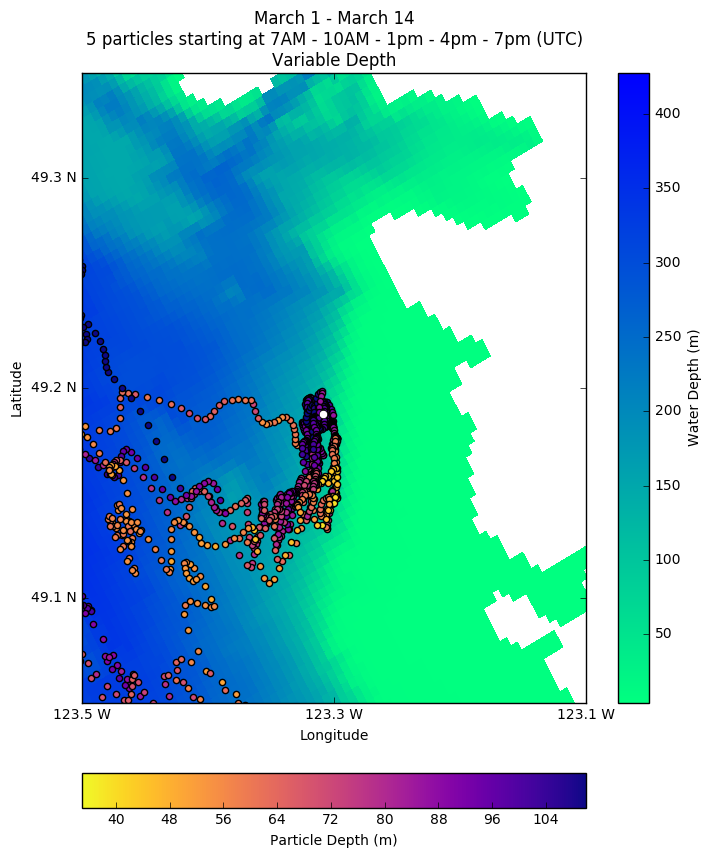

In [33]:
# 5 particles, 2 weeks, variable depths 


-


In [ ]:
Possible NEXT STEPS:
    - 3D MODELS
    - Compare different seasons
    - Make a preliminary report
    - Make a velocity field graph